# Getting Data

In [1]:
data <- read.csv("Mall_Customers.csv")
str(data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [2]:
head(data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [3]:
summary(data)

   CustomerID        Gender               Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

# Visualizing all the attributes

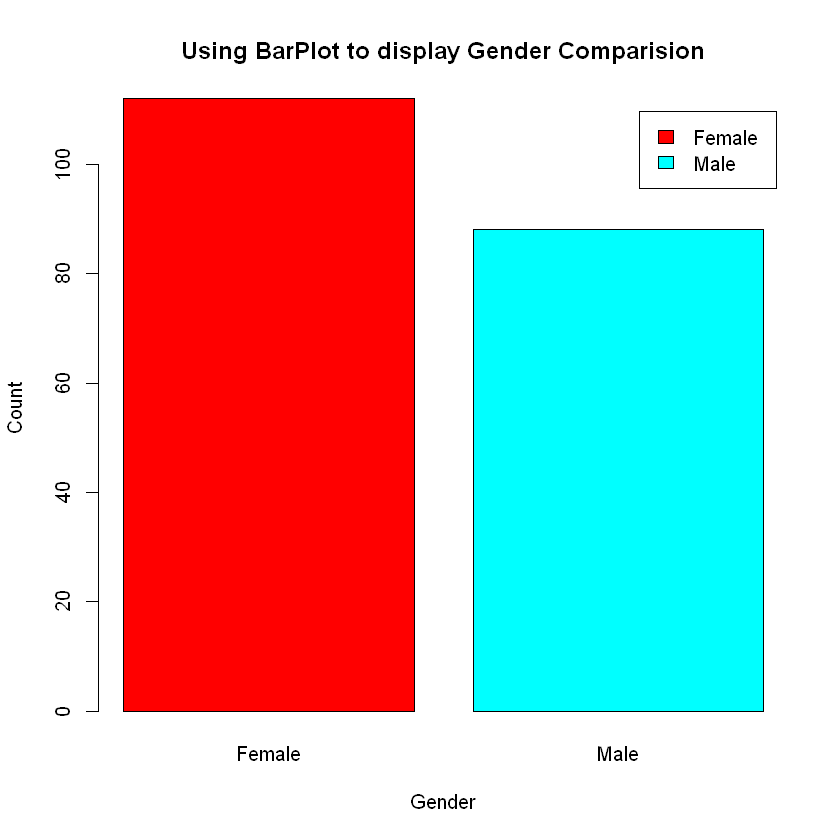

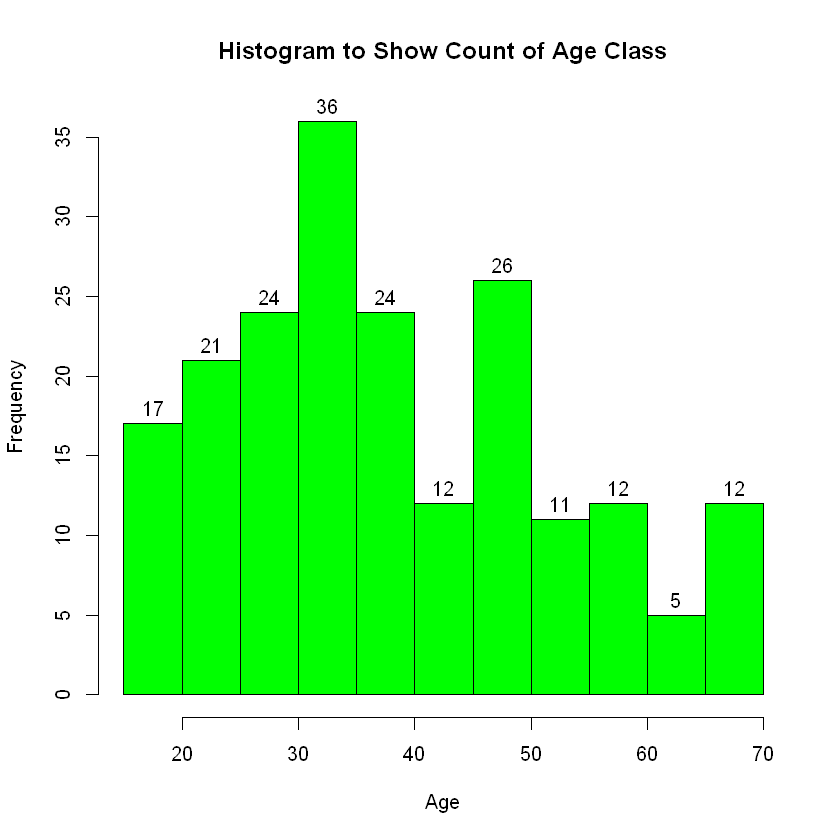

In [4]:
a=table(data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))


hist(data$Age,
    col="green",
    main="Histogram to Show Count of Age Class",
    xlab="Age",
    ylab="Frequency",
    labels=TRUE)

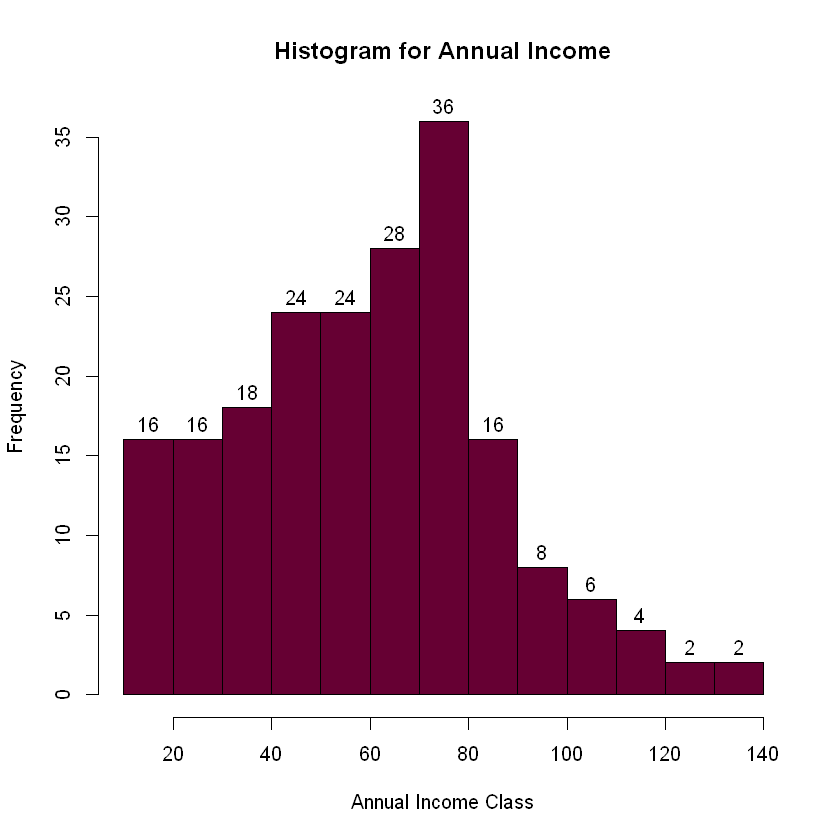

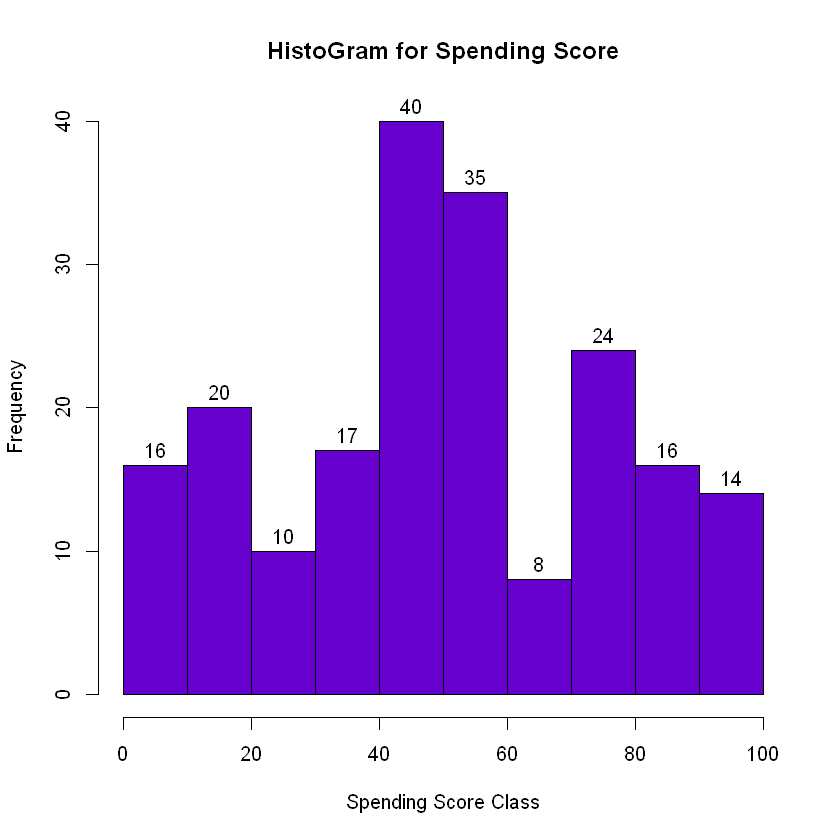

In [5]:
hist(data$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

hist(data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

# K-MEANS CLUSTERING

In [6]:
#STEP 1 - Determining the optimal no of clusters
##Here I'm using the gap statistics method.
library(cluster)

set.seed(125)
stat_gap <- clusGap(data[,3:5], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
#plot(stat_gap)
#Diviging into 6 clusters
k6<-kmeans(data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 35, 22, 38, 44, 22, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 41.68571           88.22857               17.28571
2 44.31818           25.77273               20.27273
3 27.00000           56.65789               49.13158
4 56.34091           53.70455               49.38636
5 25.27273           25.72727               79.36364
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 [38] 5 2 5 4 5 2 3 2 5 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 [75] 4 3 4 3 3 4 4 3 4 4 3 4 4 3 3 4 4 3 4 3 3 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
[112] 3 3 3 3 3 4 4 4 4 3 3 3 6 3 6 1 6 1 6 1 6 3 6 1 6 1 6 1 6 1 6 3 6 1 6 1 6
[149] 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1
[186] 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6

Within cluster sum of squares by cluster:
[1] 16690.857  8189.000  7742.895  7607.477  40

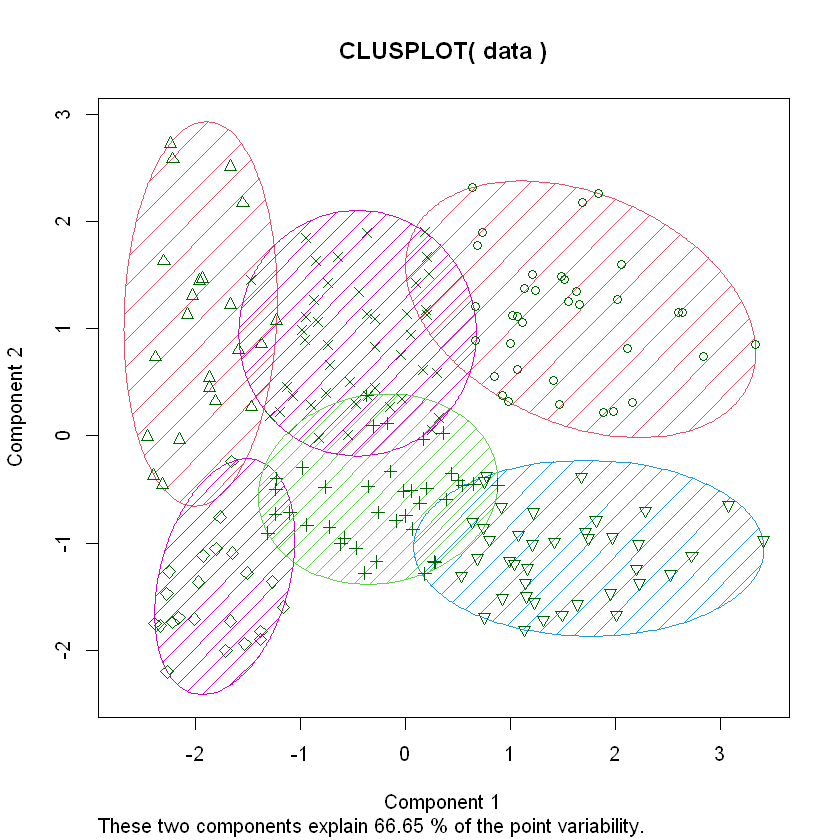

In [7]:
clusplot(data, k6$cluster, color=TRUE, shade=TRUE, labels=0,lines=0, )

In [8]:
pcclust=prcomp(data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)
pcclust$rotation[,1:2]

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


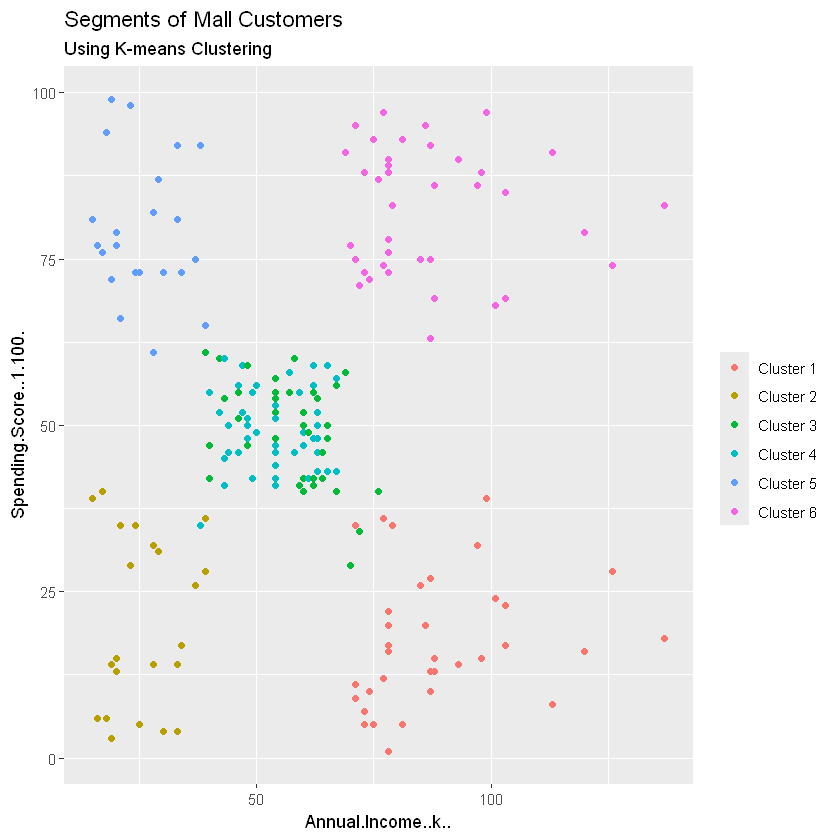

In [10]:
library("ggplot2")
set.seed(1)
ggplot(data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")
